In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [11]:
from pylibs.excel_writer import ExcelWriter, read_excel_img, read_excel_df, read_excel_text

In [3]:
# from loguru import logger
# import sys
# logger.add(sys.stdout)

### Set up example data and charts

In [4]:
df = pd.read_csv("input/titanic.csv")
df.shape

(891, 15)

In [5]:
tbl = (
    df.groupby(["who"], dropna=False, observed=False,as_index=False)
    .agg(
        **{
            "n": ("who", "size"),
            "survival_rate": ("survived", "mean"),
        }
    )
    .round({'survival_rate':2})
)
tbl

,who,n,survival_rate
0,child,83,0.59
1,man,537,0.16
2,woman,271,0.76


In [6]:
tbl_styled = (
    tbl.style
    .set_properties(**{ # background and border
        'background-color': 'lightyellow',
        'color': 'darkblue',
        'border-style': 'hair',
        'border-color': 'black',
    })
    .map(lambda x: 'color:red;' if x < 0.5 else None, subset=['survival_rate']) # color < 0.5
    .map_index(lambda v: 'background-color: lightblue;color:black;', axis=0) # Highlight column index
    .map_index(lambda v: 'background-color: green;color:black;', axis=1) # Highlight row
    .highlight_max(axis=0, subset=['n']) # Highlight max in column 'n'
)
tbl_styled

,who,n,survival_rate
0,child,83,0.590000
1,man,537,0.160000
2,woman,271,0.760000


fig.get_size_inches() = array([6.4, 4.8])


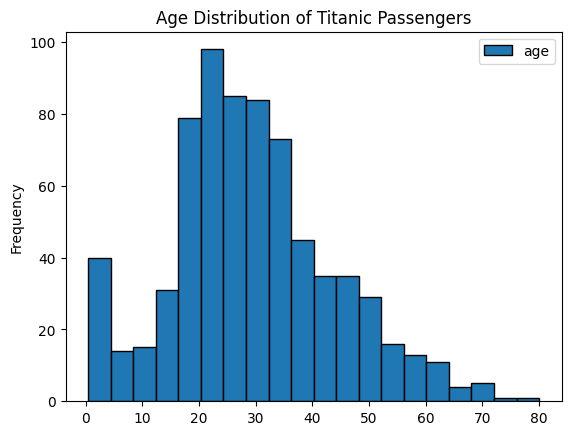

In [7]:
fig, ax = plt.subplots(1, 1)
df.plot(kind="hist", y="age", bins=20, edgecolor="black", ax=ax, title="Age Distribution of Titanic Passengers")

print(f"{fig.get_size_inches() = }") 
fig.savefig("input/age_dist.png")

### basic usage - read

In [8]:
rdf = read_excel_df(file_path=Path("input") / "xl_input1.xlsx", sheet_name='Part 3', range_ref="P2:S5", index_col=0)
rdf

,who,n,survival_rate
0,child,83,0.59
1,man,537,0.16
2,woman,271,0.76


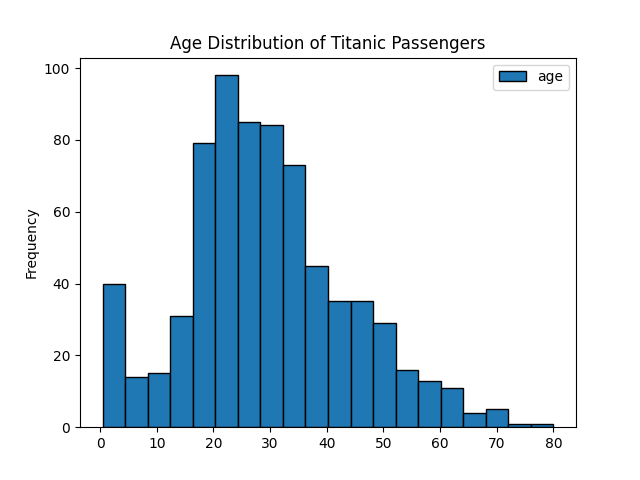

In [9]:
img = read_excel_img(file_path=Path("input") / "xl_input1.xlsx", sheet_name='Part 3', anchor_cell='B8')
img

In [12]:
text = read_excel_text(file_path=Path("input") / "xl_input1.xlsx", sheet_name='Part 3', range_ref="B38:B42")
print(text)

line1
line2
line3
line5


### Basic usage - write

In [10]:
# make new file in existing folder then write tables and figures
ew = ExcelWriter(file_path=Path("output/test.xlsx"))

ew.write_df(tbl, title="Table 1: DataFrame")
ew.write_df(tbl_styled, title="Table 2: Styled DataFrame", location="right") # can write to the right of previous item

ew.write_fig(
    fig,
    title="Figure 1: Bar Plot",
)

# images
from openpyxl.drawing import image as openpyxl_image
import io
with open("input/age_dist.png", "rb") as f:
    img = openpyxl_image.Image(io.BytesIO(f.read()))
    ew.write_fig(
        img,
        title="Figure 2: Bar Plot",
        location='right'
    )
import PIL.Image as PILImage
img = PILImage.open("input/age_dist.png")
ew.write_fig(
    img,
    title="Figure 3: Bar Plot",
)

ew.auto_fit_column_width()

ew.write_text(f"""
line 1
line 2
line 3
""", 'text')
ew.write_text("single line", location='right')
ew.write_text("single line 2 down")


ExcelWriter(file_path='output\test.xlsx', mode = w, sheet_name=Sheet), cur_row=69, cur_col=1, distance_bw_contents=2,)

In [11]:
# switch to new sheet and write items
# also showing how method calls can be chained together for simplicity
(
    ew
    .switch_to_sheet("Part 2", create_if_not_exists=True)
    .write_df(tbl, title="Table 3: DataFrame")
    .write(img, title="Figure 4: Bar Plot", scaler=0.9)
    .write(tbl_styled, title="Table 4: Styled DataFrame")
    .auto_fit_column_width()
    .write("line 1\nline 2\nline 3", title="Text")
)

ExcelWriter(file_path='output\test.xlsx', mode = w, sheet_name=Part 2), cur_row=38, cur_col=1, distance_bw_contents=2,)

In [15]:
# use with block to write items faster in one go
with ExcelWriter(file_path=Path("output/test2.xlsx")) as ew:
    (
        ew
        .write_df(tbl, title="Table 1: DataFrame")
        .write_df(tbl_styled, title="Table 2: Styled DataFrame", location="right")
        .write_fig(
            fig,
            title="Figure 0: Bar Plot",
        )
        .auto_fit_column_width()
        
        # new sheet
        .switch_to_sheet("Part 2", create_if_not_exists=True)
        .write_df(tbl, title="Table 3: DataFrame")
        .auto_fit_column_width()
    )